In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

c:\Users\Wildan Aziz\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Import the dataset
df = pd.read_csv("data/modified_healthcare_dataset.csv")
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   19  Female        AB+        Infections        2024-01-31   
1   Leslie Terry   15  Female         B-               Flu        2019-08-20   
2    Danny Smith   50  Female         A+            Cancer        2022-09-22   
3   Andrew Watts   24  Female         O+            Asthma        2020-11-18   
4  Adrienne Bell   80  Female         A+     Heart Disease        2022-09-19   

             Doctor                                     Hospital  \
0     Matthew Smith               Northwestern Memorial Hospital   
1   Samantha Davies  UI Health (University of Illinois Hospital)   
2  Tiffany Mitchell  UI Health (University of Illinois Hospital)   
3       Kevin Wells  UI Health (University of Illinois Hospital)   
4    Kathleen Hanna               Northwestern Memorial Hospital   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0         Blue Cross     2212.272701          328      Emergency   
1   UnitedHealthcare     3185.161388          265      Emergency   
2         Blue Cross    72055.214065          205       Elective   
3              Aetna     4092.601229          450       Elective   
4              Cigna    47985.660254          458        Routine   

  Discharge Date     Medication  Test Results  Length of Stay  
0     2024-02-07   Azithromycin        Normal               7  
1     2019-08-22        Tamiflu      Abnormal               2  
2     2022-10-30      Cisplatin  Inconclusive              38  
3     2020-11-19     Prednisone        Normal               1  
4     2022-10-27  Beta-blockers  Inconclusive              38

In [3]:
# Encode categorical features (Gender, Blood Type, Medical Condition, Insurance Provider, Admission Type, Medication, Test Results)
df_encoded = pd.get_dummies(df[["Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type", "Medication", "Test Results"]], drop_first=True)
df_encoded

Gender_Male  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  \
0            False          False            True           False   
1            False          False           False           False   
2            False          False           False           False   
3            False          False           False           False   
4            False          False           False           False   
...            ...            ...             ...             ...   
55495         True          False           False            True   
55496         True          False           False           False   
55497        False          False           False           False   
55498         True          False           False           False   
55499        False          False           False           False   

       Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0              False          False          False          False   
1              False           True          False          False   
2              False          False          False          False   
3              False          False           True          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
55495          False          False          False          False   
55496          False          False          False          False   
55497          False          False           True          False   
55498          False          False           True          False   
55499          False          False           True          False   

       Medical Condition_Asthma  Medical Condition_Cancer  ...  \
0                         False                     False  ...   
1                         False                     False  ...   
2                         False                      True  ...   
3                          True                     False  ...   
4                         False                     False  ...   
...                         ...                       ...  ...   
55495                     False                      True  ...   
55496                     False                     False  ...   
55497                      True                     False  ...   
55498                     False                      True  ...   
55499                     False                     False  ...   

       Medication_Orlistat  Medication_Oseltamivir  Medication_Phentermine  \
0                    False                   False                   False   
1                    False                   False                   False   
2                    False                   False                   False   
3                    False                   False                   False   
4                    False                   False                   False   
...                    ...                     ...                     ...   
55495                False                   False                   False   
55496                False                   False                   False   
55497                False                   False                   False   
55498                False                   False                   False   
55499                False                   False                   False   

       Medication_Prednisone  Medication_Rivastigmine  Medication_Statins  \
0                      False                    False               False   
1                      False                    False               False   
2                      False                    False               False   
3                       True                    False               False   
4                      False                    False               False   
...                      ...                      ...                 ...   
55495                  False                    False               False   
554

In [4]:
# Standardize the numerical features
numerical_columns = ["Age", "Billing Amount", "Room Number", "Length of Stay"]
df_numerical = df[numerical_columns]
df_numerical

Age  Billing Amount  Room Number  Length of Stay
0       19     2212.272701          328               7
1       15     3185.161388          265               2
2       50    72055.214065          205              38
3       24     4092.601229          450               1
4       80    47985.660254          458              38
...    ...             ...          ...             ...
55495   62    59679.584305          417              41
55496   63    26828.223456          316              44
55497   28     6041.030866          347               3
55498   75    44495.656362          321              47
55499   53    15953.455966          448              10

[55500 rows x 4 columns]

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
df_scaled

array([[-1.37411737, -0.83238332,  0.23311956, -0.53477453],
       [-1.5636402 , -0.79111411, -0.31355599, -0.7814188 ],
       [ 0.09468458,  2.13030206, -0.83419937,  0.99441989],
       ...,
       [-0.947691  , -0.66997026,  0.39798996, -0.73208994],
       [ 1.27920229,  0.96124622,  0.17237783,  1.43837957],
       [ 0.23682671, -0.2494926 ,  1.27440631, -0.38678798]])

In [6]:
# Combine the encoded categorical and the scaled numerical data
df_final = np.concatenate([df_scaled, df_encoded], axis=1)
df_final

array([[-1.37411737, -0.83238332,  0.23311956, ...,  0.        ,
         0.        ,  1.        ],
       [-1.5636402 , -0.79111411, -0.31355599, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09468458,  2.13030206, -0.83419937, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.947691  , -0.66997026,  0.39798996, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.27920229,  0.96124622,  0.17237783, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23682671, -0.2494926 ,  1.27440631, ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
# Apply UMAP for dimensionality reduction (3D plot)
umap_model = umap.UMAP(n_components=3, random_state=42)
umap_result = umap_model.fit_transform(df_final)

c:\Users\Wildan Aziz\anaconda3\envs\tf\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [8]:
# Create a DataFrame to hold UMAP results along with the medical condition for coloring
umap_result_df = pd.DataFrame(umap_result, columns=["UMAP 1", "UMAP 2", "UMAP 3"])
umap_result_df["Medical Condition"] = df["Medical Condition"]

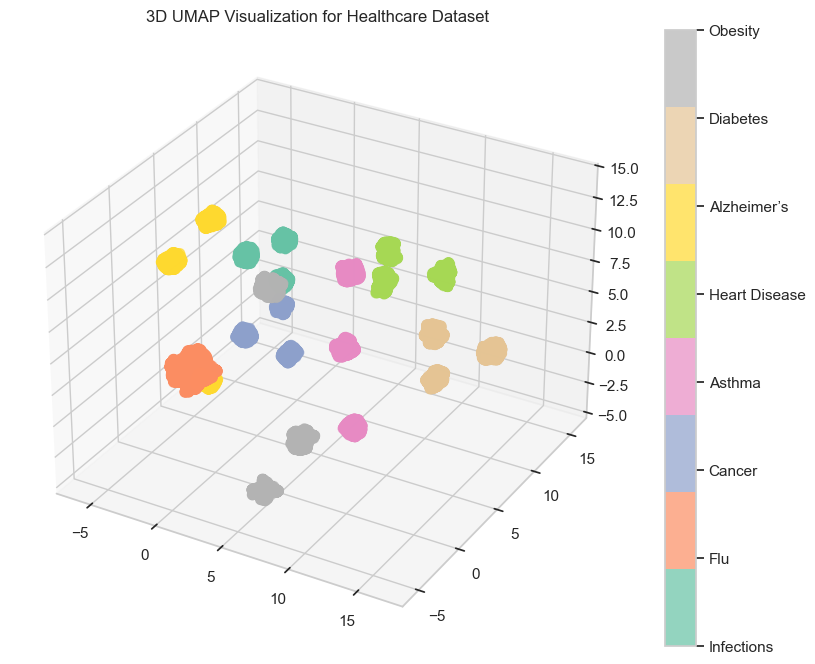

In [ ]:
# Set the seaborn style
sns.set(style="whitegrid")

# Convert 'Medical Condition' to numeric codes for coloring
umap_result_df["Medical Condition Code"] = pd.Categorical(umap_result_df["Medical Condition"]).codes


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the 3D scatter plot
scatter = ax.scatter(
    umap_result_df["UMAP 1"],
    umap_result_df["UMAP 2"],
    umap_result_df["UMAP 3"],
    c=umap_result_df["Medical Condition Code"], cmap="Set2", s=50, alpha=0.7
)

# Add labels and title
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_title("3D UMAP Visualization for Healthcare Dataset")

# Add color bar
cbar = plt.colorbar(scatter)

# Set the ticks of the color bar to be the names of the diseases
cbar.set_ticks(range(len(umap_result_df["Medical Condition"].unique())))
cbar.set_ticklabels(umap_result_df["Medical Condition"].unique())

# Save the plot as a PNG file
plt.savefig("data/umap_plot_3d.png", dpi=300)

plt.show()

In [10]:
# Create the interactive 3D scatter plot
fig = px.scatter_3d(umap_result_df, x="UMAP 1", y="UMAP 2", z="UMAP 3", color="Medical Condition",
                    title="Interactive 3D UMAP Visualization for Healthcare Dataset",
                    labels={"UMAP 1": "", "UMAP 2": "", "UMAP 3": ""},
                    color_continuous_scale="Set2", opacity=0.7,
                    hover_data={"UMAP 1": True, "UMAP 2": True, "UMAP 3": True, "Medical Condition": True},
                    size_max=10)

# Adjust figure layout for size and better readability
fig.update_layout(
    width=1000,  # Increase the width
    height=800,  # Increase the height
    scene=dict(
        xaxis=dict(title=""),
        yaxis=dict(title=""),
        zaxis=dict(title=""),
    ),
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    margin=dict(l=0, r=0, t=80, b=0)
)

# Show the plot
fig.show()